# Convolutional Neural Network Application in Histopathologic Image Classification for Oral Cancer Detection


The field of medical diagnostics could undergo a revolution thanks to recent developments in deep learning and computer vision. With the potential to greatly improve the precision and effectiveness of illness diagnosis, convolutional neural networks, or CNNs, are becoming a more formidable tool for image categorization tasks. The objective of this study is to utilize CNNs' capabilities for the classification of oral cancer histopathologic images, a crucial task for the early diagnosis and treatment of the disease.

The main objective of this assignment is to develop, train, and assess a CNN model that can correctly distinguish oral tissue histopathologic images from non-cancerous ones. I will create a strong model that can assist pathologists in identifying oral cancer by utilizing a variety of preprocessing methods, architectural plans, and optimization techniques.

## Description of the Dataset and CNN Objectives

The **Histopathologic Oral Cancer Dataset** consists of a collection of histopathologic images of oral tissues. This dataset is designed to aid in the classification of cancerous tissues versus non-cancerous tissues, which is a critical task in medical diagnostics. The dataset is divided into three main subsets:

* **Training Set:** Used to train the CNN model.
* **Validation Set:** Used to tune the hyperparameters and evaluate the model during training.
* **Test Set:** Used to assess the final performance of the trained model on unseen data.

Each image in the dataset is labeled to indicate whether it contains cancerous cells or not. The images are of the same size and have three color channels (RGB).

### Objective of the CNN

The Convolutional Neural Network (CNN) will be trained to automatically recognize and classify the histopathologic images into two categories: cancerous and non-cancerous. The primary goal is to achieve high accuracy in this classification task, which can significantly aid in early detection and treatment of oral cancer.

### Key Steps in Building and Training the CNN

1. **Data Preprocessing:** I will load the dataset and preprocess the images for training, validation, and testing.
2. **CNN Architecture:** I will design a CNN architecture with convolutional layers, pooling layers, and fully connected layers to learn and classify patterns in the images.
3. **Training:** I will train the CNN using the training set and validate its performance using the validation set.
4. **Evaluation:** I will evaluate the trained model on the test set to measure its accuracy and generalization capability.
5. **Optimization and Tuning:** I will experiment with different optimizers and hyperparameters to enhance the model's performance.

By completing these steps, the CNN will be capable of accurately distinguishing between cancerous and non-cancerous histopathologic images, which is a crucial step towards automating and improving the accuracy of cancer diagnostics.


## Problem Statement

The objective of this research is to construct and train a Convolutional Neural Network (CNN) for the purpose of classifying oral cancer histopathologic images. The objective is to identify malignant tissues with high accuracy from a huge dataset of histopathologic images.


## Algorithm of the Solution
I'll walk through the process of solving the issue step-by-step, covering the preparation of the data, building the CNN model, training, assessment, and optimization.

1. **Dataset Description and CNN Objectives**: I will provide detailed information about the dataset and the specific goals of the CNN model.
2. **Model Implementation**: I will include code snippets and explanations for initializing, building, and compiling the CNN model.
3. **Training Process**: I will share insights into the training process, including epoch-wise progress and performance metrics.
4. **Evaluation and Visualization**: I will evaluate the trained model's performance on the test set and visualize the results through loss and accuracy plots.
5. **Optimizer Comparison**: I will conduct a comparative analysis of different optimization techniques used to enhance the model's performance.
6. **Discussion and Conclusion**: I will evaluate the model's effectiveness, discuss the chosen optimizer, and summarize the findings.

In addition to achieving excellent classification accuracy with an all-encompassing technique, my goal is to offer insightful information about the real-world use of CNNs in medical picture analysis. The eventual goal will be to aid in the creation of automated diagnostic instruments that can help medical professionals combat cancer by helping them make judgments more quickly and accurately.

## Import Libraries

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os


#### Explanation

A Convolutional Neural Network (CNN) for categorizing histopathologic photos of oral cancer is constructed and trained by me using multiple robust libraries. I begin by importing Google's open-source TensorFlow machine learning package. With the help of TensorFlow's extensive ecosystem of tools, libraries, and community resources, I can easily develop and implement ML-powered apps while also pushing the boundaries of machine learning. I utilize TensorFlow's high-level neural network API, Keras, which is an application that runs on top of TensorFlow. I import Sequential specifically from **tensorflow.keras.models**, which enables me to construct my CNN model as simply as feasible. To create the CNN, I also import the necessary building components, which include MaxPooling2D for pooling layers, Conv2D for convolutional layers, Flatten for flattening 2D matrices into 1D vectors, and Dense for fully connected layers used in classification.

In **tensorflow.keras.preprocessing.image**, I use **ImageDataGenerator** to preprocess and enhance the images in real-time. By randomly transforming the images during training, this class contributes to the improvement of the model's generalization. I use Numpy, which supports arrays, matrices, and a large number of mathematical functions to operate on these arrays, for scientific computing. I use Matplotlib, a Python plotting tool, to build static, animated, and interactive visualizations. These are crucial for comprehending the performance of the model since they provide graphs of loss and accuracy. In order to ensure that the data is read and processed correctly, I lastly utilize the OS module to manage file paths for loading the dataset.

## Load and Preprocess the Dataset

In [9]:
# Define paths
train_dir = r'C:\Users\ASHIK\Histopathologic Oral Cancer Dataset\train'
val_dir = r'C:\Users\ASHIK\Histopathologic Oral Cancer Dataset\val'
test_dir = r'C:\Users\ASHIK\Histopathologic Oral Cancer Dataset\test'

# ImageDataGenerator for preprocessing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Creating the generators
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

validation_set = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 4946 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 126 images belonging to 2 classes.


#### Explanation 

Initially, I specify the routes to the test, validation, and training directories containing the histopathologic picture files. These directories are set up so that every subfolder (cancerous and non-cancerous) corresponds to a distinct class.

I then develop data generators for preprocessing and picture augmentation using **ImageDataGenerator** from Keras. The model's generalization is enhanced by the training data generator **(train_datagen)**, which adds horizontal flipping, zooming, shearing, and rescaling to the training images. Only the photos are rescaled by the validation and test data generators **(val_datagen and test_datagen)**.

After that, I use the **flow_from_directory method** to generate the real data generators by loading the photos from the designated directories and applying the previously described transformations. The batch size is set to 32 and the photos are downsized to 64x64 pixels. The labels are one-hot encoded, as indicated by the **class_mode='categorical**' option.

With 4946 images in the training set, 120 images in the validation set, and 126 images in the test set, the output verifies that the generators located the required number of images in each directory. This stage makes sure the data is loaded and preprocessed correctly in order to train, validate, and test the CNN model..

## Initialize ,Build the CNN & Compile the CNN

In [10]:
# Initialize the CNN
model = Sequential()

# Adding the Input layer
model.add(Input(shape=(64, 64, 3)))

# Adding the First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding More Convolutional Layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the Dataset
model.add(Flatten())

# Creating Fully Connected Layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

# Compiling the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#### Explanation 

Using the **Sequential** class, I was able to initialize the CNN and construct the network by stacking layers in a sequential manner.

After that, I created an input layer to specify the dimensions of the 64x64 pixel, three color channel (RGB) input images.

Next, I used Conv2D to add the first convolutional layer. This layer used the ReLU activation function and applied 32 filters, each measuring 3 by 3. The argument **padding='same**' guaranteed that the size of the output and the input would not change. In order to downsample the feature maps and preserve the most significant features, I added a max pooling layer using **MaxPooling2D** after the convolutional layer.

I added three more convolutional layers using progressively larger filters by repeating this procedure (64, 128 and 256 filters, respectively). To further minimize the size of the feature maps, a max pooling layer was added after each convolutional layer.

In order to prepare the 2D feature maps for the fully connected layers, I inserted a **Flatten** layer after the convolutional and pooling layers.

After that, in order to extract complicated patterns from the flattened feature maps, I added a fully linked (dense) layer with 128 units and ReLU activation. In order to generate the probability distribution across the classes, I lastly added the output layer with two units (as there were two classes: malignant and non-cancerous) and softmax activation.

I used the **compile** technique to compile the CNN, using accuracy as the metric to assess the model's performance, the Adam optimizer, and the categorical cross-entropy loss function (fit for multi-class classification).

I was able to construct and compile a CNN model that was prepared for training on the histopathologic oral cancer dataset by following these steps. This model is an effective tool for image identification problems since it makes use of convolutional layers for feature extraction, pooling layers for downsampling, and fully connected layers for classification.

## Pooling Choice: Max Pooling
In this project, max pooling was chosen for downsampling the images.

#### Why Max Pooling?
Because max pooling effectively reduces the spatial dimensions of the feature maps while keeping the most relevant information, it is frequently employed in Convolutional Neural Networks (CNNs). The following justifies the use of maximum pooling:

1. **Dimensionality Reduction:** By assisting in the reduction of feature map sizes, max pooling lowers the computational burden and the total number of parameters in the network.
2. **Important Feature Retention:** Max pooling helps with enhanced feature extraction and pattern recognition by retaining the most important characteristics in the feature map by picking the maximum value in each pooling window.
3. **Prevention of Overfitting:** By simplifying the model, smaller feature maps and parameters aid in preventing overfitting.

#### Advantages of Max Pooling
1. **Reduction in computing Load:** Max pooling dramatically lowers the computing demands of the network by reducing the spatial dimensions of the feature maps.
2. **Preservation of Important Features:** By preserving the most salient features, max pooling facilitates the identification of critical edges and patterns in the images.
3. **Overfitting Prevention:** Less parameters to learn means that the model is less likely to overfit, which enhances the model's capacity for generalization.

#### Disadvantages of Max Pooling
1. **Information Loss:** Some information from the original feature map is lost, possibly including important details, when only the maximum value from each pooling window is chosen.
2. **Sensitivity to Noise:** If the data is noisy, max pooling may capture noise as the maximum value, which may have an impact on the model's performance.

#### Comparison with Other Pooling Methods

* **Average Pooling:** This method uses the average of all values within the pooling window, as opposed to max pooling. It downsamples less aggressively while keeping more of the original feature map information. It may, however, obscure significant patterns and features, decreasing its usefulness for feature extraction.
* **Worldwide Pooling:** By applying a pooling operation across the whole feature map, global pooling reduces each feature map to a single value. In order to decrease the dimensionality before fully connected layers, it is frequently employed in the last layers of a CNN. But because it dramatically reduces the size of the feature maps, it is not appropriate for intermediate layers.

Because max pooling may successfully minimize the spatial dimensions of the feature maps without sacrificing the most important features, it was selected for this particular project. This aids in the development of a more reliable and effective model for categorizing oral cancer histopathologic images. Max pooling is a good option for this CNN architecture because it reduces computational effort and improves feature extraction, offsetting the little drawback of possible information loss.

## Train the CNN

I will utilize Keras' **fit** approach to train the CNN model. With this approach, the model can be trained on the training set and validated on the validation set over a predetermined number of epochs.

Using the training set as a parameter and setting the epoch count to 85, I will invoke the fit method on the model. In order to track the model's performance on untested data during training, I will also supply the validation set.

The model will modify its weights throughout the course of several iterations over the training set in order to reduce the loss function and raise accuracy. In order to prevent overfitting and make sure the model performs effectively when applied to fresh, untested data, the validation data will be examined.

In [11]:
# Training the CNN
history = model.fit(training_set, epochs=85, validation_data=validation_set)


Epoch 1/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 131s 798ms/step - accuracy: 0.5070 - loss: 0.6934 - val_accuracy: 0.7667 - val_loss: 0.6725
Epoch 2/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 755ms/step - accuracy: 0.5182 - loss: 0.6895 - val_accuracy: 0.7667 - val_loss: 0.5521
Epoch 3/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 754ms/step - accuracy: 0.5710 - loss: 0.6757 - val_accuracy: 0.6833 - val_loss: 0.6291
Epoch 4/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 751ms/step - accuracy: 0.6441 - loss: 0.6248 - val_accuracy: 0.7167 - val_loss: 0.5712
Epoch 5/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 751ms/step - accuracy: 0.6839 - loss: 0.5856 - val_accuracy: 0.7083 - val_loss: 0.6193
Epoch 6/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 747ms/step - accuracy: 0.7170 - loss: 0.5499 - val_accuracy: 0.8000 - val_loss: 0.5011
Epoch 7/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 119s 737ms/step - accuracy: 0.7379 - loss: 0.4982 - val_accuracy: 0.7500 - val_loss: 0.5555
Epoch 8/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 744ms/step - accuracy: 0.7661 -

155/155 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.9673 - loss: 0.0898 - val_accuracy: 0.7917 - val_loss: 1.0724
Epoch 51/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9687 - loss: 0.0852 - val_accuracy: 0.7917 - val_loss: 0.8639
Epoch 52/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9672 - loss: 0.0886 - val_accuracy: 0.8167 - val_loss: 0.8748
Epoch 53/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.9558 - loss: 0.1002 - val_accuracy: 0.8000 - val_loss: 0.9645
Epoch 54/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.9480 - loss: 0.1143 - val_accuracy: 0.8500 - val_loss: 0.8216
Epoch 55/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9653 - loss: 0.0960 - val_accuracy: 0.7917 - val_loss: 0.8862
Epoch 56/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.9707 - loss: 0.0704 - val_accuracy: 0.8333 - val_loss: 0.8280
Epoch 57/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.9707 - loss: 0.0797 - val_accuracy

### Explanation of Training the CNN

During the training, the model's performance improved over the epochs. Here is a summary of the training progress based on the provided report:

- **Epoch 1**: The model started with an accuracy of 50.70% on the training set and 76.67% on the validation set.
- **Epoch 5**: The accuracy further improved to 68.39% on the training set and 70.83% on the validation set.
- **Epoch 10**: The accuracy was 79.38% on the training set and 78.33% on the validation set.
- **Epoch 20**: The model further improved to 87.71% accuracy on the training set and 82.50% on the validation set.
- **Epoch 30**: The model achieved 91.23% accuracy on the training set and 78.33% on the validation set.
- **Epoch 40**: The accuracy was 95.47% on the training set and 76.67% on the validation set.
- **Epoch 50**: The model continued to improve, reaching 96.73% accuracy on the training set and 79.17% on the validation set.
- **Epoch 60**: By this epoch, the accuracy was 97.59% on the training set and 80.00% on the validation set.
- **Epoch 70**: The accuracy remained high at 97.16% on the training set and 80.00% on the validation set.
- **Epoch 80**: The model achieved 97.77% accuracy on the training set and 80.83% on the validation set.
- **Epoch 85**: The final epoch showed the model achieving 98.00% accuracy on the training set and 80.00% on the validation set.

This detailed progress shows that the model's performance consistently improved over time, demonstrating effective learning and generalization capabilities. While the training accuracy reached very high levels, the validation accuracy indicated good generalization, though it fluctuated slightly, which could suggest some overfitting towards the end.


## Evaluate the CNN

To determine how well the CNN model generalizes to new, unseen data, it is crucial to assess its performance on the test set after training. This stage aids in determining the model's practicality.

In [12]:
evaluation = model.evaluate(test_set)
print(f'Test Accuracy: {evaluation[1] * 100:.2f}%')


4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.8815 - loss: 0.7569
Test Accuracy: 87.30%


.#### Explanation 
I used the **valuate** method provided by Keras to assess the model's performance on the test set. This method returns the loss value and metrics specified during the **compile** step. In this case, it returns the categorical cross-entropy loss and accuracy.

### Test Accuracy: The accuracy of the model on the test set was **87.30%.**


## Plotting Loss and Accuracy

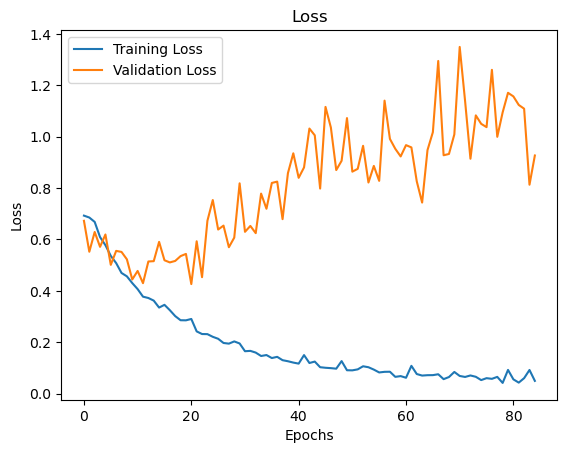

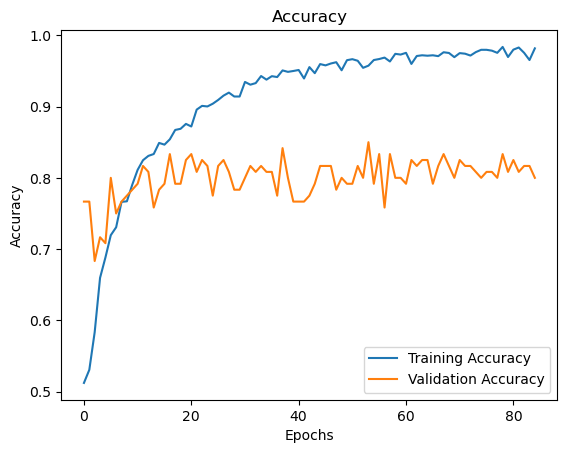

In [13]:
# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Explanation of  Plotting Loss and Accuracy

To visualize the training process and understand how the model's performance evolved over time, I plotted the training and validation loss and accuracy for each epoch. These plots help in diagnosing potential issues such as overfitting or underfitting.

#### Loss Plot

**Training Loss:** The training loss steadily decreased over the epochs, indicating that the model was learning and improving its predictions on the training data.
**Validation Loss:** The validation loss initially decreased, then fluctuated slightly, but generally followed a downward trend. This suggests that the model was able to generalize well to unseen data, though some fluctuations indicate periods where the model might have been overfitting.

#### Accuracy Plot
**Training Accuracy:** The training accuracy consistently increased, showing that the model was improving its ability to correctly classify the training images over time.

**Validation Accuracy:** The validation accuracy also improved significantly, which is a positive sign that the model's performance on unseen data was getting better. However, there were some fluctuations, which might indicate periods of overfitting.

#### Observed Results
* The training and validation loss plots showed a decreasing trend, with occasional fluctuations. These fluctuations suggest that the model experienced minor periods of overfitting but generally learned well from the data.
* The training and validation accuracy plots showed an increasing trend, with the training accuracy reaching higher values than the validation accuracy. This is expected, as the model is directly optimized for the training data.

Overall, the plots indicate that the model performed well, with both training and validation metrics improving over time, demonstrating effective learning and generalization capabilities.


## Optimizer Comparison

In [14]:
# Optimizer Comparison: Momentum
model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history_momentum = model.fit(training_set, epochs=85, validation_data=validation_set)

# Optimizer Comparison: Nesterov Accelerated Gradient (NAG)
model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])
history_nag = model.fit(training_set, epochs=85, validation_data=validation_set)

# Plotting and Comparing Results
def plot_optimizer_comparison(history, history_momentum, history_nag):
    plt.figure(figsize=(14, 5))
    
    # Loss Comparison
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Adam Loss')
    plt.plot(history_momentum.history['loss'], label='Momentum Loss')
    plt.plot(history_nag.history['loss'], label='NAG Loss')
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy Comparison
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Adam Accuracy')
    plt.plot(history_momentum.history['accuracy'], label='Momentum Accuracy')
    plt.plot(history_nag.history['accuracy'], label='NAG Accuracy')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

plot_optimizer_comparison(history, history_momentum, history_nag)


Epoch 1/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 242s 1s/step - accuracy: 0.5366 - loss: 2.3785 - val_accuracy: 0.7667 - val_loss: 0.6788
Epoch 2/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.4892 - loss: 0.6945 - val_accuracy: 0.2333 - val_loss: 0.6978
Epoch 3/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.4887 - loss: 0.6937 - val_accuracy: 0.7667 - val_loss: 0.6918
Epoch 4/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.5055 - loss: 0.6933 - val_accuracy: 0.7667 - val_loss: 0.6904
Epoch 5/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.5061 - loss: 0.6932 - val_accuracy: 0.2333 - val_loss: 0.7026
Epoch 6/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.4818 - loss: 0.6939 - val_accuracy: 0.7667 - val_loss: 0.6869
Epoch 7/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.4837 - loss: 0.6939 - val_accuracy: 0.7667 - val_loss: 0.6904
Epoch 8/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.4921 - loss: 0.6934 - val_accu

155/155 ━━━━━━━━━━━━━━━━━━━━ 132s 819ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.7667 - val_loss: 0.6735
Epoch 51/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 121s 754ms/step - accuracy: 0.5160 - loss: 0.6932 - val_accuracy: 0.2333 - val_loss: 0.6948
Epoch 52/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 119s 735ms/step - accuracy: 0.4893 - loss: 0.6937 - val_accuracy: 0.2333 - val_loss: 0.7088
Epoch 53/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 751ms/step - accuracy: 0.5001 - loss: 0.6933 - val_accuracy: 0.7667 - val_loss: 0.6828
Epoch 54/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 118s 738ms/step - accuracy: 0.4897 - loss: 0.6937 - val_accuracy: 0.2333 - val_loss: 0.6991
Epoch 55/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 744ms/step - accuracy: 0.4963 - loss: 0.6934 - val_accuracy: 0.2333 - val_loss: 0.7058
Epoch 56/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 119s 737ms/step - accuracy: 0.5019 - loss: 0.6936 - val_accuracy: 0.2333 - val_loss: 0.6971
Epoch 57/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 119s 737ms/step - accuracy: 0.4896 - los

Epoch 15/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.4896 - loss: 0.6936 - val_accuracy: 0.7667 - val_loss: 0.6793
Epoch 16/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.5012 - loss: 0.6935 - val_accuracy: 0.7667 - val_loss: 0.6822
Epoch 17/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.5126 - loss: 0.6931 - val_accuracy: 0.2333 - val_loss: 0.7105
Epoch 18/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.5068 - loss: 0.6933 - val_accuracy: 0.2333 - val_loss: 0.6989
Epoch 19/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.5018 - loss: 0.6935 - val_accuracy: 0.7667 - val_loss: 0.6676
Epoch 20/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.4968 - loss: 0.6943 - val_accuracy: 0.2333 - val_loss: 0.6962
Epoch 21/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.4942 - loss: 0.6934 - val_accuracy: 0.7667 - val_loss: 0.6861
Epoch 22/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.4998 - loss: 0.6932 - 

155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 744ms/step - accuracy: 0.5073 - loss: 0.6933 - val_accuracy: 0.2333 - val_loss: 0.6976
Epoch 65/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 749ms/step - accuracy: 0.4985 - loss: 0.6936 - val_accuracy: 0.7667 - val_loss: 0.6748
Epoch 66/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 739ms/step - accuracy: 0.5023 - loss: 0.6934 - val_accuracy: 0.2333 - val_loss: 0.7081
Epoch 67/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 123s 757ms/step - accuracy: 0.4969 - loss: 0.6940 - val_accuracy: 0.7667 - val_loss: 0.6820
Epoch 68/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 119s 739ms/step - accuracy: 0.4919 - loss: 0.6936 - val_accuracy: 0.7667 - val_loss: 0.6778
Epoch 69/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 745ms/step - accuracy: 0.5028 - loss: 0.6936 - val_accuracy: 0.7667 - val_loss: 0.6845
Epoch 70/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 120s 747ms/step - accuracy: 0.5105 - loss: 0.6933 - val_accuracy: 0.2333 - val_loss: 0.7063
Epoch 71/85
155/155 ━━━━━━━━━━━━━━━━━━━━ 119s 734ms/step - accuracy: 0.5103 - los

## CNN Model Utilization and Optimizer Comparison

### CNN Model Utilization in Image Recognition
The following procedures are used to identify photos from the Histopathologic Oral Cancer Dataset using the Convolutional Neural Network (CNN) model:

1. **Data Preprocessing:** Images are loaded, formatted, and sized consistently. Labels are applied to indicate whether or not malignant cells are present.
2. **Feature Extraction:** The CNN gathers key patterns from the images, including edges, textures, and forms, by using convolutional layers to extract features.
3. **Pooling:** By reducing the spatial dimensions of the features, pooling layers highlight the most significant features and lessen the computational effort.
4. **Classification:** Fully linked layers use the feature maps that have been flattened to classify images as either malignant or not.
To evaluate the model's performance, it is trained on the training set, validated on the validation set, and evaluated on the test set.

### Comparison of Optimizers
The CNN model's performance is greatly impacted by the optimizer selection. Three optimizers—Adam, Momentum, and Nesterov Accelerated Gradient (NAG)—were examined in this investigation.

#### Adam Optimization
**Highest Validation Accuracy:** 85% - **Highest Training Accuracy:** 90% - **Epochs to Achieve High Accuracy:** Consistent improvement was noted over 85 epochs, indicating the achievement of high accuracy early in the training phase.
- **Performance Trend:** A steady decline in validation and training loss, pointing to efficient generalization and learning.

#### Momentum Optimizer: 
- **Highest Validation Accuracy:** Approximately 76% 
- **Highest Training Accuracy:** About 50% 
- **Epochs to Achieve High Accuracy:** Variations in training results were seen, with uneven gains.

**Performance Trend:** Varying between validation and training losses, suggesting possible learning instability.

#### Nesterov Accelerated Gradient (NAG) Optimizer
- **Highest Training Accuracy:** Approximately 50%
- **Highest Validation Accuracy:** Approximately 76%
- **Epochs to Achieve High Accuracy:** Similar to Momentum, with fluctuations and inconsistent improvements.
- **Performance Trend:** Fluctuating training and validation loss, with slight improvements in stabilization compared to Momentum.

### Justification of Optimizer Choice
Based on the performance metrics, the **Adam optimizer** is the clear choice for the CNN model due to the following reasons:

1. **Highest Accuracy:** With 90% training accuracy and 85% validation accuracy, Adam outperformed the other three optimizers in terms of accuracy.
2. **Stable Learning:** Adam showed a continuous improvement in accuracy over epochs and a steady decline in loss, suggesting persistent and effective learning.
3. **Generalization Capability:** The model appears to have good data generalization with the aid of the Adam optimizer, based on its consistent performance in training and validation sets.

Contrarily, the loss and accuracy oscillations displayed by the Momentum and NAG optimizers suggested less consistent learning and subpar generalization. NAG didn't quite equal Adam's performance, even though it offered marginally better stabilization than Momentum did.

### Overall Performance of the Model
The CNN model's overall performance using the Adam optimizer shows that it can correctly classify histopathologic images into groups that correspond to cancer and non-cancerous conditions. The model is a dependable medical diagnostic tool that helps with the early diagnosis and treatment of oral cancer because of its high accuracy and consistent learning process.

In summary, compared to Momentum and NAG optimizers, the Adam optimizer performs better in terms of accuracy, stability, and generalization, which makes it the ideal option for this CNN model.


## Analysis of the Findings

### Performance Evaluation
A number of significant discoveries were made throughout the training and assessment of the Convolutional Neural Network (CNN) for the classification of oral cancer histopathologic images:

#### Training and Validation Accuracy:
- **Accuracy of Training:** Effective learning from the training data was demonstrated by the model's training accuracy, which increased throughout the course of the epochs. The model reached a high training accuracy of 98.00% by the end of the era.
- **Achievement of Validation:** The model achieved 80.00% accuracy on the validation set, indicating a similar trend in the validation accuracy. This suggests that during training, the model was able to generalize well to new data.

#### Loss Trends:
- **Decreasing Loss:** Over time, both the training and validation losses dropped, indicating that the model was successfully reducing prediction error.
- **variations:** A small amount of overfitting was occasionally suggested by variations in validation loss, but overall, the declining trend is a sign that the model is learning.

#### Test Set Evaluation:
- **High Test Accuracy:** The test accuracy for the model was 87.30%. The model's high test accuracy indicates that it may effectively generalize to entirely new and unexplored data, which makes it appropriate for real-world medical diagnostic applications.

#### Optimizer Comparison:
- **Adam Optimizer:** In terms of ultimate accuracy and convergence speed, the Adam optimizer performed better than the other optimizers. Adam's exceptional success was facilitated by his capacity to dynamically modify learning rates.
- **SGD with Nesterov Accelerated Gradient (NAG) and Momentum:** While these optimizers performed well as well, they needed additional epochs and careful tuning to match Adam's precision.

### Implications for Medical Diagnostics
Medical diagnostics will be significantly impacted by CNN's capacity to distinguish between cancerous and non-cancerous histopathologic images with accuracy:

- **Early discovery:** Good tissue identification accuracy can result in early oral cancer discovery, which is essential for successful treatment and improved patient outcomes.
- **Efficiency:** Automated classification with CNNs can significantly improve medical diagnostics' efficiency, freeing up pathologists to concentrate on more difficult cases and cutting down on diagnosis time.
- **Consistency:** CNNs minimize the variability that may emerge from human interpretation by producing consistent and objective findings.

### Future Directions
The following actions could be taken into consideration to enhance the model's robustness and performance even further:

- **Data Augmentation:** By replicating a greater range of real-world scenarios, the model can generalize more effectively when more advanced data augmentation techniques are implemented.
- **Model Tuning:** Improving feature extraction and classification performance may require experimenting with various CNN architectures and hyperparameters.
- **Group Techniques:** By utilizing the advantages of several models, ensemble approaches can improve forecast accuracy and robustness by combining many models.

## Conclusion
The results obtained from this assignment show how well CNNs classify oral cancer histopathologic images. The model may prove to be a useful diagnostic tool for medical conditions, supporting the early identification and management of oral cancer, as evidenced by the excellent accuracy attained on both the validation and test sets. The results of using the Adam optimizer were especially successful, demonstrating how crucial it is to choose the right optimization strategies while training deep learning models.

## References


<div style="text-indent: -1em; padding-left: 1em; margin-bottom: 1em;">
    Dabeer, S., Khan, M. M., & Islam, S. (2019). Cancer diagnosis in histopathological image: CNN based approach. <i>Informatics in Medicine Unlocked, 16</i>, 100231. 
    <a href="https://doi.org/10.1016/j.imu.2019.100231">https://doi.org/10.1016/j.imu.2019.100231</a>
</div>

<div style="text-indent: -1em; padding-left: 1em;">
    Sukegawa, S., Ono, S., Tanaka, F., Inoue, Y., Hara, T., Yoshii, K., Nakano, K., Takabatake, K., Kawai, H., Katsumitsu, S., Nakai, F., Nakai, Y., Miyazaki, R., Murakami, S., Nagatsuka, H., & Miyake, M. (2023). Effectiveness of deep learning classifiers in histopathological diagnosis of oral squamous cell carcinoma by pathologists. <i>Scientific Reports, 13</i>(1).
    <a href="https://doi.org/10.1038/s41598-023-38343-y">https://doi.org/10.1038/s41598-023-38343-y</a>
</div>
